## Observations and Insights 

Observations:
1. There was less variability in tumor volumes for drug regimens 'Capomulin' and 'Ramicane'
2. Both 'Capomulin' and 'Ramicane'have lower SEM showing that the standard error falls as the sample size increases. 
2. Drug regimen 'Capomulin' shows a strong correlation between weight and tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
mouse_study_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study_results['Mouse ID'].unique())
print(f'Number of mice: {number_of_mice}')

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_df=mouse_study_results.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
grouped_df[grouped_df.values > 1]


Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_results[mouse_study_results['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results[mouse_study_results['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(mouse_study_results['Mouse ID'].unique())
print(f'Number of mice after dropping duplicate mouse: {number_of_mice}')

Number of mice after dropping duplicate mouse: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_value = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_value = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_value_variance = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_std_error = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean Tumor Value':  mean_tumor_value,
        'Median Tumor Value': median_tumor_value,
        'Tumor Value Variance': tumor_value_variance,
        'Tumor Value Std. Dev.': tumor_vol_std,
        'Tumor Value Std. Err.' :tumor_vol_std_error})
summary_df


,Mean Tumor Value,Median Tumor Value,Tumor Value Variance,Tumor Value Std. Dev.,Tumor Value Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_results.groupby(
   ['Drug Regimen']
).agg(
    {
         'Tumor Volume (mm3)':['mean','median','var','std','sem']
                    
    }
)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

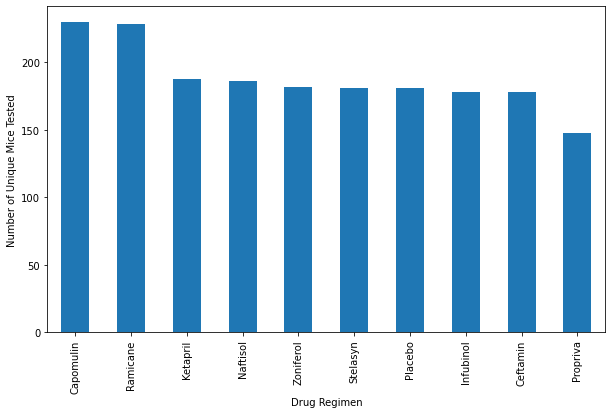

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupbydrugregimen = mouse_study_results.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)
# groupbydrugregimen
ax = groupbydrugregimen.plot(kind='bar',figsize=(10,6))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Unique Mice Tested");


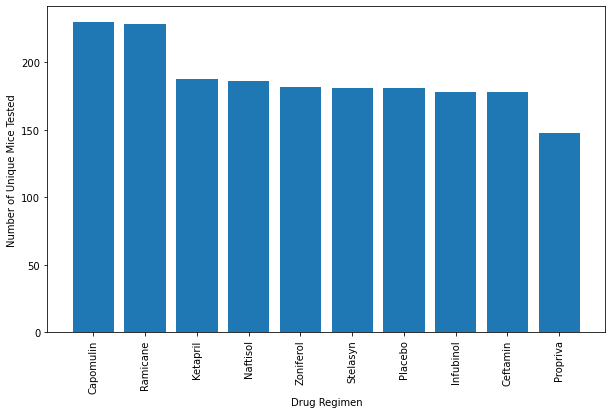

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_vals = mouse_study_results.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(y_vals.keys(),y_vals)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90)
plt.show()

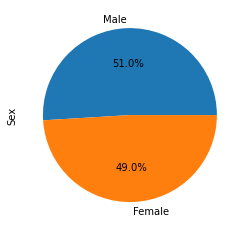

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = mouse_study_results.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
ax.set_ylabel('Sex');


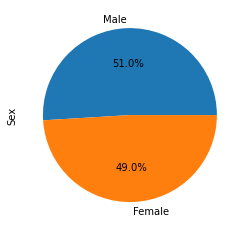

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
val = mouse_study_results.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_mouse_study_results = mouse_study_results[mouse_study_results['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
reduced_mouse_study_results = reduced_mouse_study_results[['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']]
# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = reduced_mouse_study_results.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorvalueoflasttimepoint = pd.merge(reduced_mouse_study_results, lasttimepoint, on=['Mouse ID','Timepoint'])
tumorvalueoflasttimepoint = tumorvalueoflasttimepoint[['Drug Regimen', 'Timepoint','Tumor Volume (mm3)']]


In [14]:
import numpy as np
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(tumorvalueoflasttimepoint['Drug Regimen'].unique())
 
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for t in range(len(treatments)):
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tv = tumorvalueoflasttimepoint[tumorvalueoflasttimepoint['Drug Regimen'] == treatments[t]]['Tumor Volume (mm3)']
    tumorvol.append(tv)
    q1 = np.quantile(tv,0.25)
    q3 = np.quantile(tv,0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
#     print("\ntreatment: ", treatments[t], "\nq1: ",q1,"\nq3: ",q3,"\niqr: ",iqr,"\nlower: ",lower_bound,"\nupper: ",upper_bound)

    # Determine outliers using upper and lower bounds
    for index, value in tv.items():
        if (value > upper_bound) or (value < lower_bound):
            outliers.append(value) 
            print('Drug Regimen ', treatments[t], ' has an outlier: ', outliers)    
    

Drug Regimen  Infubinol  has an outlier:  [36.321345799999996]


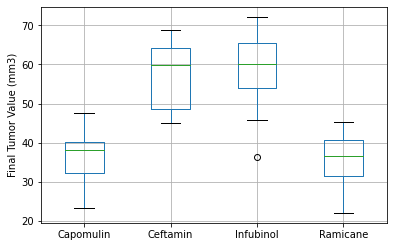

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot = tumorvalueoflasttimepoint.boxplot(by='Drug Regimen',column=['Tumor Volume (mm3)'])
           
boxplot.set_title("")
plt.suptitle("")
boxplot.set_ylabel("Final Tumor Value (mm3)")
boxplot.set_xlabel("")
plt.show()

## Line and Scatter Plots

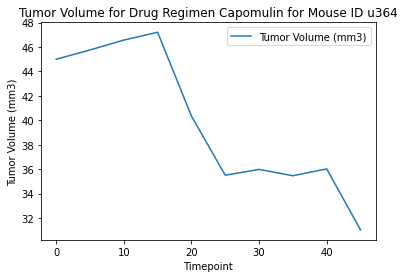

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_u364_mouse_study_results = mouse_study_results[(mouse_study_results['Drug Regimen']=="Capomulin") & (mouse_study_results['Mouse ID']=="u364")]
ax = capomulin_u364_mouse_study_results.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume for Drug Regimen Capomulin for Mouse ID u364')
plt.show()

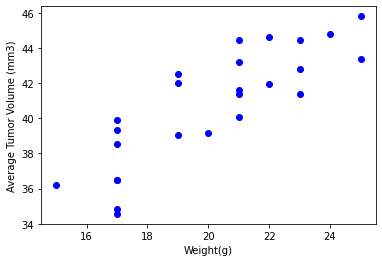

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_study_results = mouse_study_results[(mouse_study_results['Drug Regimen']=="Capomulin")]
avgtumorvol=capomulin_mouse_study_results.groupby(['Weight (g)','Mouse ID'])['Tumor Volume (mm3)'].mean()
avgtumorvol

for name, group in avgtumorvol.iteritems():
    plt.scatter(x=name[0],y=group,color='blue')
    
    plt.xlabel('Weight(g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    

## Correlation and Regression

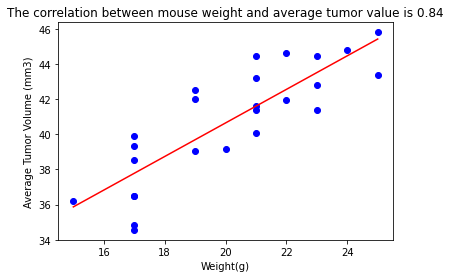

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

capomulin_mouse_study_results = mouse_study_results[(mouse_study_results['Drug Regimen']=="Capomulin")]
avgtumorvol=capomulin_mouse_study_results.groupby(['Weight (g)','Mouse ID'])['Tumor Volume (mm3)'].mean()
weight = []
tumorvol = []
for name, group in avgtumorvol.iteritems():
    weight.append(name[0])
    tumorvol.append(group)

plt.scatter(x=weight,y=tumorvol,color='blue')
 
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
    
# print(type(weight[0]))    
#y = mx + b
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,tumorvol)
# print(type(slope))
y = []
for index in range(len(weight)):
    y.append(weight[index] * slope + intercept)
plt.plot(weight,y,'r-')
ax = plt.title('The correlation between mouse weight and average tumor value is ' + str(round(rvalue,2)))
